Binary information at transmitter:
[0, 1, 0, 0, 1, 1, 0, 1]


Text(0.5, 1.0, 'Transmitting Information as Digital Signal')

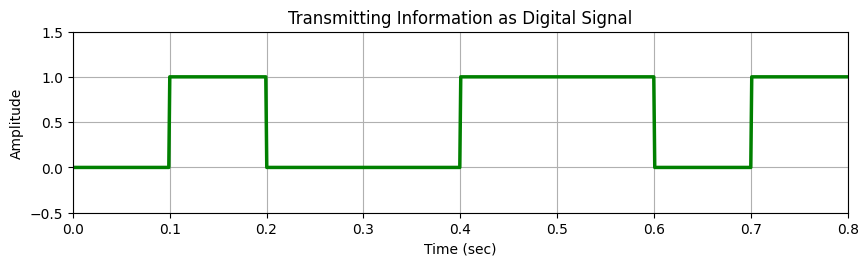

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
bp = 0.1  # Bit period
bit = [0, 1, 0, 0, 1, 1, 0, 1]  # Binary information to transmit
print("Binary information at transmitter:")
print(bit)

# Representation of transmitting binary information as a digital signal
bit_rate = 1 / bp
n = 100  # Number of samples per bit
digit = []  # Digital signal initialization

for b in bit:
    if b == 1:
        se = np.ones(n)  # High for bit 1
    else:
        se = np.zeros(n)  # Low for bit 0
    digit = np.concatenate((digit, se))

t1 = np.linspace(0, bp * len(bit), len(digit))  # Time vector for digital signal
plt.figure(figsize=(10, 8))

# Plot digital signal
plt.subplot(3, 1, 1)
plt.plot(t1, digit, linewidth=2.5, color='g')
plt.grid(True)
plt.axis([0, bp * len(bit), -0.5, 1.5])
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.title('Transmitting Information as Digital Signal')



Text(0.5, 1.0, 'PSK Modulated Signal')

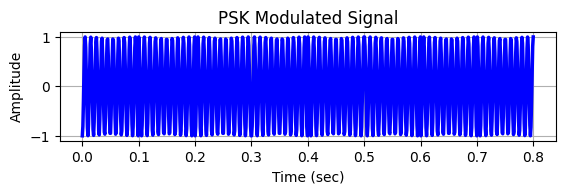

In [7]:
# Binary PSK Modulation
f = bit_rate * 10  # Carrier frequency
t2 = np.linspace(0, bp, n)  # Time vector for one bit period
x = []  # Modulated signal initialization

for b in bit:
    if b == 1:
        y = np.cos(2 * np.pi * f * t2)  # Carrier for bit 1
    else:
        y = np.cos(2 * np.pi * f * t2 + np.pi)  # Carrier for bit 0 (180° phase shift)
    x = np.concatenate((x, y))

t3 = np.linspace(0, bp * len(bit), len(x))  # Time vector for modulated signal
plt.subplot(3, 1, 2)
plt.plot(t3, x, linewidth=2.5, color='b')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('PSK Modulated Signal')



Demodulated binary information at receiver:
[0, 1, 0, 0, 1, 1, 0, 1]


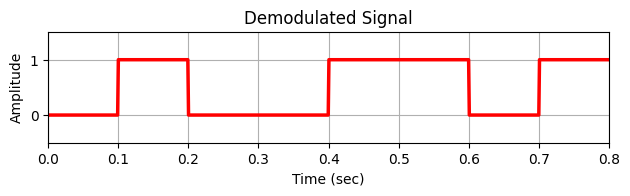

In [8]:
# Binary PSK Demodulation
demodulated_bit = []  # Demodulated binary sequence
for i in range(len(bit)):
    # Extract each bit duration segment from the modulated signal
    segment = x[i * n:(i + 1) * n]

    # Correlation with the reference carrier (0° phase)
    corr = np.sum(segment * np.cos(2 * np.pi * f * t2))

    # Decision: if correlation is positive, it's bit 1; else bit 0
    if corr > 0:
        demodulated_bit.append(1)
    else:
        demodulated_bit.append(0)

print("Demodulated binary information at receiver:")
print(demodulated_bit)

# Digital representation of demodulated data
demodulated_signal = []
for b in demodulated_bit:
    if b == 1:
        se = np.ones(n)  # High for bit 1
    else:
        se = np.zeros(n)  # Low for bit 0
    demodulated_signal = np.concatenate((demodulated_signal, se))

# Plot demodulated signal
plt.subplot(3, 1, 3)
plt.plot(t1, demodulated_signal, linewidth=2.5, color='r')
plt.grid(True)
plt.axis([0, bp * len(bit), -0.5, 1.5])
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.title('Demodulated Signal')

plt.tight_layout()
plt.show()
